# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [80]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [15]:
df_raw.count()


admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [30]:
df_raw.shape

(400, 4)

In [31]:
len(df_raw.count())

4

In [14]:
np.sum(df_raw.count())

#or 

400+398+398+399

1595L

Answer: 1595 oberservations

#### Question 2. Create a summary table

In [ ]:
#function

In [18]:

df_raw.describe()


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [21]:
df_raw.groupby('admit').gre.mean()


admit
0    573.579336
1    618.897638
Name: gre, dtype: float64

In [22]:
df_raw.groupby('admit').gpa.mean()

admit
0    3.345404
1    3.489206
Name: gpa, dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

# Answer: 
A higher STD value indicates a larger variation in the dataset compared to the mean; whereas a smaller STD value indicates the closer to the mean value. In this case, the GRE values have a higher STD, this can be due to outliers or larger range values. ex) people scoring extremely low or extremely high can cause a higher STD. Also, GRE score ranges from a min of 220 and max of 800. This is a larger range than compared to GPA, which has a min of 2.26 vs max 4.00. 

#### Question 4. Drop data points with missing data


In [34]:
df_raw.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [36]:
# first drop the column
df_raw.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [38]:
df_raw.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [39]:
len(df_raw.index)

397

In [46]:
df_raw.shape

(397, 5)

# Answer: 
You can count the number of rows by using the len() or df.shape functions. This is case, we went from 400 rows to 397 rows after dropping the nulls

#### Question 6. Create box plots for GRE and GPA

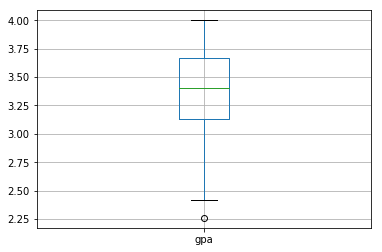

In [53]:
# boxplot 1
df_raw.boxplot(column='gpa')

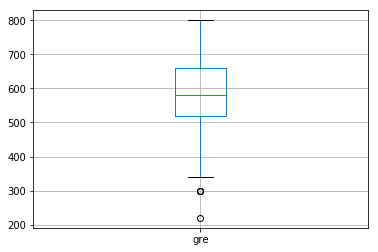

In [54]:
# boxplot 2
df_raw.boxplot(column='gre')

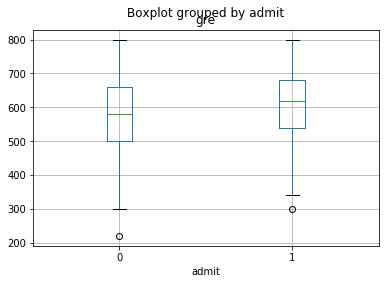

In [56]:
df_raw.boxplot(column='gre', by='admit')

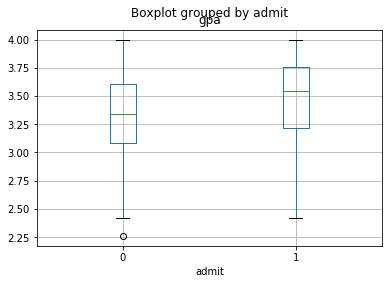

In [55]:
df_raw.boxplot(column='gpa', by='admit')

In [73]:
df_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 7. What do this plots show?

Answer:it shows the max, min, median, outliers, and quartiles of the two variables - GPA & GREs  - similiar to what was in the describe() function with the exception of the outliers & median.


#### Question 8. Describe each distribution 

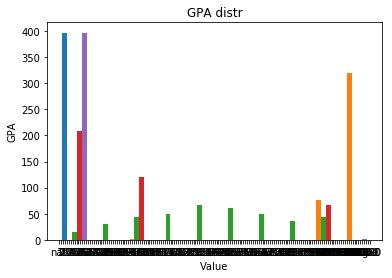

In [119]:
# plot the distribution of each variable 

#plt.hist(df_raw.columns(['gpa','gre', 'admit', 'prestige'])
plt.hist(df_raw.loc[ :, :])
plt.title("GPA distr")
plt.xlabel("Value")
plt.ylabel("GPA")
plt.show()

(array([  3.,   4.,  16.,  32.,  42.,  57.,  76.,  65.,  39.,  63.]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

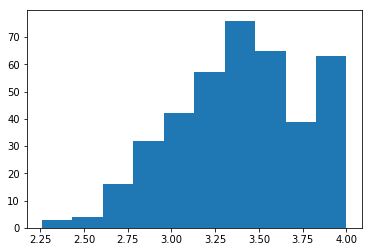

In [103]:
plt.hist(df_raw.loc[ :, 'gpa'])

(array([  1.,   3.,  16.,  28.,  50.,  75.,  81.,  64.,  44.,  35.]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

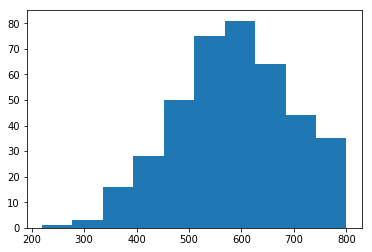

In [104]:
plt.hist(df_raw.loc[ :, 'gre'])

(array([  61.,    0.,    0.,  148.,    0.,    0.,  121.,    0.,    0.,   67.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

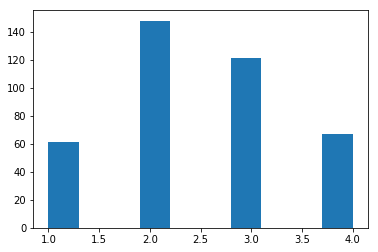

In [107]:
plt.hist(df_raw.loc[ :, 'prestige'])

(array([ 271.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  126.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

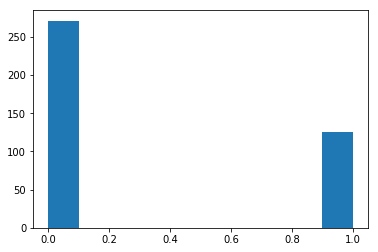

In [108]:
plt.hist(df_raw.loc[ :, 'admit'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

No because of the following:
outliers throwing off our distributions. 
it would fail the 68-95-99.7 Rule
Multiple distributions may be combined in your data, giving the appearance of a bimodal or multimodal distribution.


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 
yes, remove the outliers so it doesn't skew our dataset
run tests - including the one sample Z test, T test and ANOVA assume normality
transform the data with a function/filtering, forcing it to fit a normal model

#### Question 11. Which of our variables are potentially colinear? 

In [122]:
# create a correlation matrix for the data
df_raw.corr(method='pearson', )

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [131]:
df_raw_admit = df_raw[df_raw.admit == 1]
df_raw_admit.corr(method='pearson', )

,admit,gre,gpa,prestige
admit,NaN,NaN,NaN,NaN
gre,NaN,1.000000,0.232765,-0.080485
gpa,NaN,0.232765,1.000000,-0.039360
prestige,NaN,-0.080485,-0.039360,1.000000


#### Question 12. What did you find?

Answer: 

GPA & GRE has the higest correlation i.e., the higher GPA & GRE the more correlation & vice versa -  the lower GPA & GRE the more correlation 
prestige & gpa has the lowest correlation, i.e., gpa doesn't matter for grad school prestige levels

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
we can use numpy, pandas, matplotlib to explore the data. for instance, transform the data by filtering on only addmitted and then see the correlation. we can also plot the distribution, drop outliers, drop null values. plot the prestige using clusters i.e., K nearest neighbors
then you can model the data using sklearn and predict using linear regression,  etc...


#### Question 14. What is your hypothesis? 

Answer: The higher the GPA and GRE the higher the admit rate

## Bonus/Advanced

In [ ]:
# 1. Bonus: Explore alternatives to dropping obervations with missing data

In [134]:
df_raw[df_raw.admit != 0]

,admit,gre,gpa,prestige,X
1,1,660.0,3.67,3.0,NaN
2,1,800.0,4.00,1.0,NaN
3,1,640.0,3.19,4.0,NaN
5,1,760.0,3.00,2.0,NaN
6,1,560.0,2.98,1.0,NaN
8,1,540.0,3.39,3.0,NaN
12,1,760.0,4.00,1.0,NaN
14,1,700.0,4.00,1.0,NaN
19,1,540.0,3.81,1.0,NaN
21,1,660.0,3.63,2.0,NaN


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data